In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

Get data from Mexico

In [3]:
from weather.all_data import CountryGPS, WeatherLoop
from weather.main import ParameterEnum
from datetime import date
import matplotlib.pyplot as plt

mexico = CountryGPS(
    name="MEXICO",
    latitude=27.483333333333334,
    longitude=-109.9833333,
)
start = date(year=2001, month=1, day=1)
end = date(year=2023, month=12, day=31)

loop = WeatherLoop(url="https://power.larc.nasa.gov/api/temporal/hourly/point")
list = ParameterEnum.T2M
df_t2m = loop.get_all_data(
    gps=mexico,
    start_date=start,
    end_date=end,
    parameter=list,
    name_column="Temperatura_a_2_metros"
)
print(df_t2m)

              time  Temperatura_a_2_metros
0       2000123117                   20.01
1       2000123118                   18.53
2       2000123119                   17.64
3       2000123120                   16.91
4       2000123121                   16.51
...            ...                     ...
193363  2023010112                   23.64
193364  2023010113                   23.50
193365  2023010114                   23.00
193366  2023010115                   22.25
193367  2023010116                   21.15

[193368 rows x 2 columns]


Plot the mexico temp

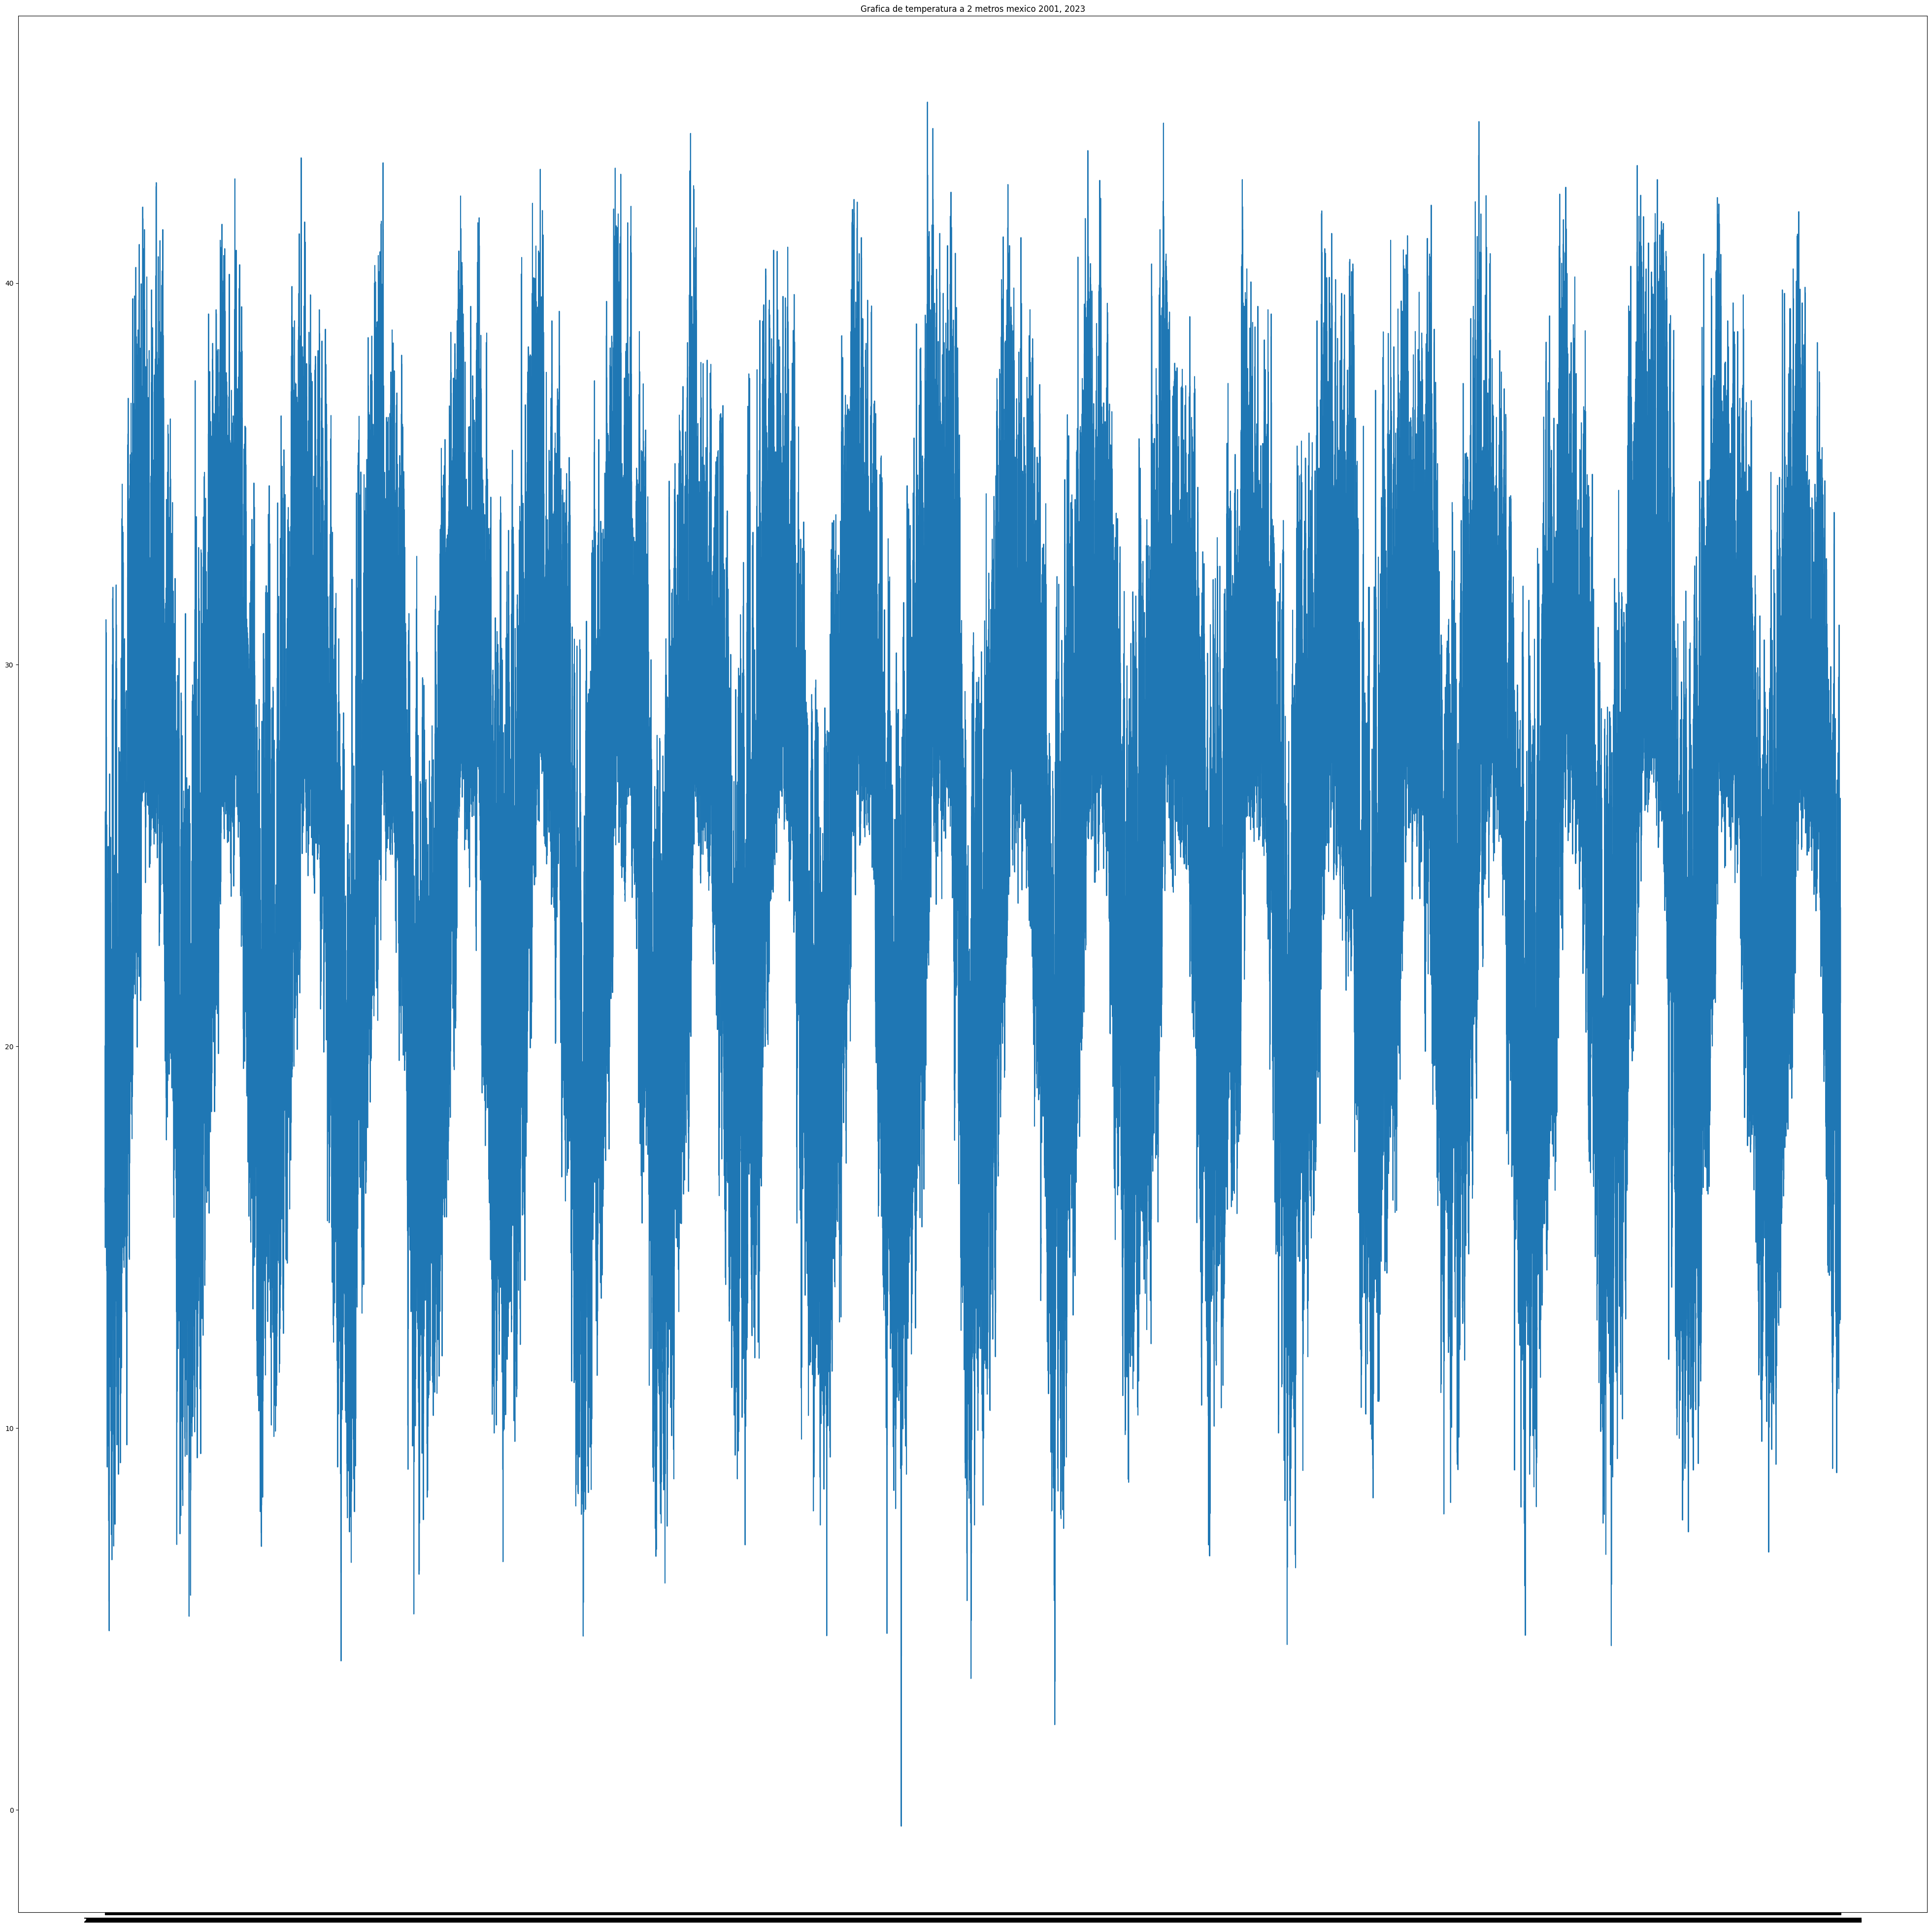

In [4]:
plt.ioff()
fig = plt.figure(figsize=(50,50))

plt.plot(df_t2m["time"], df_t2m["Temperatura_a_2_metros"]) 
# plt.show() 
plt.title('Grafica de temperatura a 2 metros mexico 2001, 2023')

plt.savefig("temperatura_mex_2001_2023.jpg")
plt.close(fig)

Dispaly de humedity

In [6]:
df_h = loop.get_all_data(
    gps=mexico,
    start_date=start,
    end_date=end,
    parameter=ParameterEnum.QV2M,
    name_column="Humedad"
)
plt.ioff()
fig = plt.figure(figsize=(50,50))

plt.plot(df_h["time"], df_h["Humedad"]) 
# plt.show() 
plt.title('Grafica de humedad mexico 2001, 2023')

plt.savefig("humedad_mex_2001_2023.jpg")
plt.close(fig)